### Disastrous Tweet Voting Classification

In [1]:
# Mathematical computation
import numpy as np
import math
import scipy

# Data manipulation
import pandas as pd

# visualisaton
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Langg Processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# splitting data
from sklearn.model_selection import train_test_split
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem.

Stemming is the process of producing morphological variants of a root/base word.
e.g. stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate

Errors in Stemming: 
There are mainly two errors in stemming – Overstemming and Understemming. Overstemming occurs when two words are stemmed to same root that are of different stems. Under-stemming occurs when two words are stemmed to same root that are not of different stems

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words

In [2]:
train_df = pd.read_csv("disaster-tweets-train.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df = pd.read_csv("disaster-tweets-test.csv")
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df.shape, test_df.shape

((7613, 5), (3263, 4))

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
(train_df['location'].isnull().sum()/len(train_df['location']))*100

33.27203467752528

    We can approx 33 percent values are missing from location column, we can't drop it directly otherwise we will loose import information.
    let explore this column more:

In [9]:
train_df['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [10]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [11]:
train_df.drop(["location"], axis=1, inplace=True)
test_df.drop(["location"], axis=1, inplace=True)

In [12]:
train_df['keyword']=train_df['keyword'].fillna(train_df['keyword'].value_counts().idxmax())

In [13]:
test_df['keyword'] = test_df['keyword'].fillna(test_df['keyword'].value_counts().idxmax())

In [14]:
print(train_df.isnull().sum())

id         0
keyword    0
text       0
target     0
dtype: int64


In [15]:
print(test_df.isnull().sum())

id         0
keyword    0
text       0
dtype: int64


In [16]:
train_df.head(2)

,id,keyword,text,target
0,1,fatalities,Our Deeds are the Reason of this #earthquake M...,1
1,4,fatalities,Forest fire near La Ronge Sask. Canada,1


In [17]:
train_df['target'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='target', ylabel='count'>

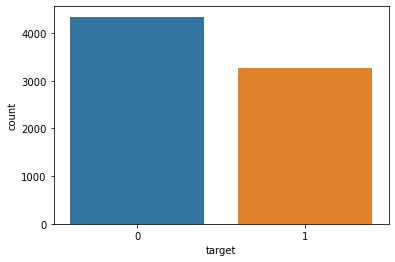

In [18]:
sns.countplot(x=train_df['target'])

In [19]:
# removing id columns from both training and testing dataset, as they have no means to us
train_df.drop(["id"], axis=1, inplace=True)
test_df.drop(["id"], axis=1, inplace=True)

In [20]:
# Remove extra punctuations
train_df["text"].replace("[^a-zA-Z]", " ",regex = True, inplace = True)
test_df["text"].replace("[^a-zA-Z]", " ",regex = True, inplace = True)

In [21]:
# convert all letter to lower case
train_df['text']=train_df['text'].str.lower()

In [22]:
test_df['text']=test_df['text'].str.lower()

In [23]:
stop_words=stopwords.words('english')

In [25]:
# removing stopwords
# train_df['text']=train_df['text'].apply(lambda x: x for x in train_df['text'] if x not in stop_words)

In [27]:
train_df['text']=[x for x in train_df['text'] if x not in stop_words]

In [28]:
test_df['text'].apply(lambda x: [item for item in x if item not in stop_words])

0       [j, u,  , h, p, p, e, n, e,  ,  , e, r, r, b, ...
1       [h, e, r,  , b, u,  ,  , e, r, h, q, u, k, e, ...
2       [h, e, r, e,  ,  ,  , f, r, e,  , f, r, e,  , ...
3       [p, c, l, p, e,  , l, g, h, n, g,  ,  ,  , p, ...
4       [p, h, n,  , u, e, l, r,  , k, l, l,  ,  ,  , ...
                              ...                        
3258    [e, r, h, q, u, k, e,  , f, e,  , l,  , n, g, ...
3259    [r,  , n,  , r,  , w, r, e,  , h, n,  , l,  , ...
3260    [g, r, e, e, n,  , l, n, e,  , e, r, l, e, n, ...
3261    [e, g,  , u, e,  , h, z, r, u,  , w, e, h, e, ...
3262    [ , c, f, c, l, g, r,  , h,  , c, v, e,  ,  , ...
Name: text, Length: 3263, dtype: object

In [29]:
# !pip install wordcloud

In [30]:
from wordcloud import WordCloud

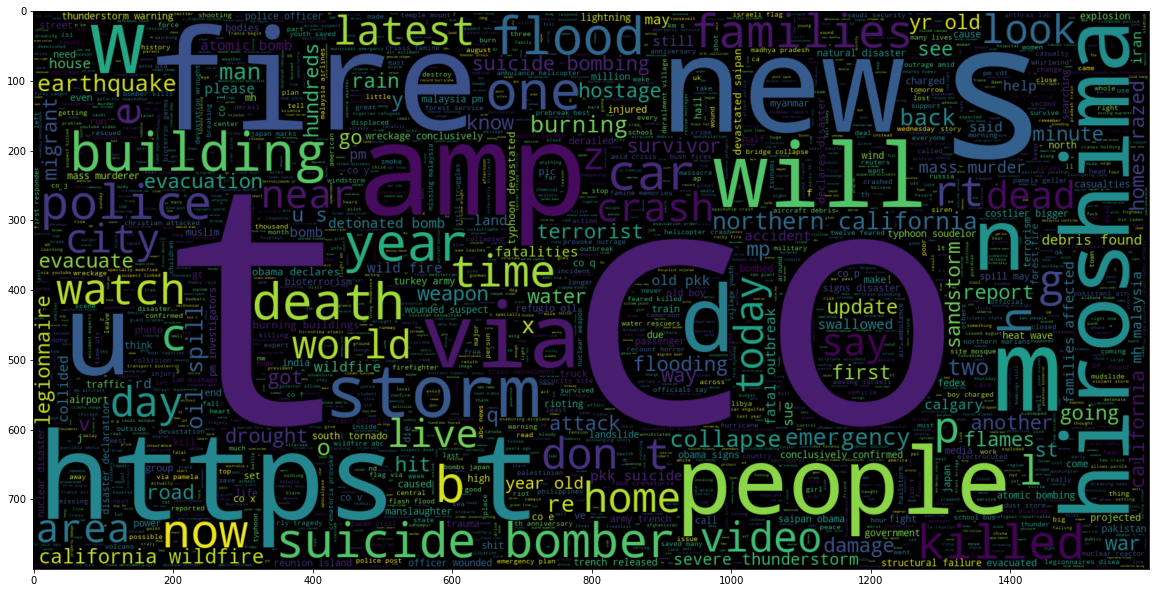

In [31]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train_df[train_df.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

In [32]:
train_df.head(2)

,keyword,text,target
0,fatalities,our deeds are the reason of this earthquake m...,1
1,fatalities,forest fire near la ronge sask canada,1


In [33]:
train_df.text[0:5]

0    our deeds are the reason of this  earthquake m...
1               forest fire near la ronge sask  canada
2    all residents asked to  shelter in place  are ...
3           people receive  wildfires evacuation or...
4    just got sent this photo from ruby  alaska as ...
Name: text, dtype: object

In [34]:
X = train_df.drop(['target'],axis = 1)
y = train_df['target']

In [35]:
X["sentence"] = X['keyword'] + " " + X['text']
X_train = np.array(X["sentence"])

In [36]:
test_df["sentence"] = test_df['keyword'] + " " + test_df['text']
Xtest = np.array(test_df["sentence"])

In [37]:
from sklearn.feature_extraction.text import CountVectorizer,  TfidfVectorizer, HashingVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(X_train)

keyword = vectorizer.get_feature_names()
xtrain = vectorizer.transform(X_train)
xtest = vectorizer.transform(Xtest)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression()
model2 = ComplementNB()
model3 = SVC()

In [39]:
final_model = VotingClassifier(estimators=[('lOG', model1), ('NB', model2), ('SVC',model3)], voting='hard')
final_model.fit(xtrain, y)
pred = final_model.predict(xtest)

## filling submission.csv
# submission = pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
# submission["target"] = pred
# submission.to_csv("voting_ensemble.csv", index=False)
# submission.head()

In [40]:
final_model.predict(xtest)

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [41]:
import joblib

In [42]:
joblib.dump(final_model,'TweetPred.pkl')

['TweetPred.pkl']